In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from scipy.io import arff
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import keras.backend as K
from keras import regularizers
import keras_tuner as kt
from keras.utils.vis_utils import plot_model
from multi_label_metrics import *
from label_info import label_counter
import seaborn as sns
tfk = tf.keras
tf.keras.backend.set_floatx("float32")
import tensorflow_probability as tfp
tfd = tfp.distributions
neg_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)
Adam = tf.keras.optimizers.Adam


In [2]:
from numpy.random import seed
seed(1122)
from tensorflow.random import set_seed
set_seed(1234)
y = np.genfromtxt('bedadhes.txt')

In [3]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
x= np.genfromtxt('inp_data.txt')
for i in range(np.shape(x)[0]):
    x[i]= NormalizeData(x[i])
rows = np.shape(y)[0]
np.histogram(y,bins=3)

(array([717, 459,  97], dtype=int64),
 array([0.        , 0.24128889, 0.48257778, 0.72386667]))

(array([717., 459.,  97.]),
 array([0.        , 0.24128889, 0.48257778, 0.72386667]),
 <BarContainer object of 3 artists>)

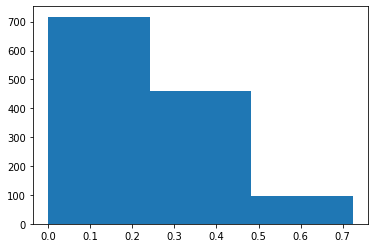

In [4]:
plt.hist(y,bins=3)

In [5]:
split_index = int(rows * 0.8)
x_train = x[:split_index,:]
x_test = x[split_index:,:]
y_train = y[:split_index]
y_test = y[split_index:]
train_size = np.shape(x_train)[0]
train_size
input_dim = np.shape(x_train)[1]
output_dim = 1

In [6]:
def create_model():
    kl_divergence_function = (lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(train_size, dtype='float32'))

    model = tf.keras.models.Sequential([
          Dense(
              100,activation='tanh',input_dim=input_dim, dtype ='float32'),
          Dense(
              80,activation='tanh',dtype ='float32'),
          Dense(
              50, activation='tanh', dtype ='float32'),
          Dense(
              10, activation='tanh', dtype ='float32'),
          tfp.layers.DenseFlipout(
             output_dim, kernel_divergence_fn=kl_divergence_function,activation='sigmoid', dtype ='float32'),
  ])
    return model
model = create_model()

C:\Users\zhang\anaconda3\lib\site-packages\tensorflow_probability\python\layers\util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
C:\Users\zhang\anaconda3\lib\site-packages\tensorflow_probability\python\layers\util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


In [7]:

plot_model(model, to_file='./Point_Estimation_3D.png', show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               12600     
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
 dense_flipout (DenseFlipout  (None, 1)                21        
 )                                                               
                                                                 
Total params: 25,261
Trainable params: 25,261
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(loss='mse',optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),metrics=['mse',hamming_loss,precision_micro,recall_micro,f1_micro])

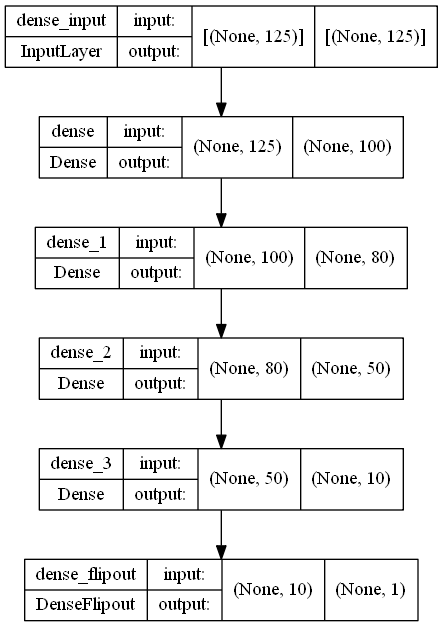

In [9]:

plot_model(model, to_file='./Model_Last_Layer_BNN_3D_Point.png', show_shapes=True)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train,y_train,epochs=5000,batch_size=256,validation_split=0.15,shuffle=True)

Epoch 1/5000
4/4 [==============================] - 4s 294ms/step - loss: 0.1130 - mse: 0.0883 - hamming_loss: 0.0225 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0716 - val_mse: 0.0469 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0804 - mse: 0.0558 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0565 - val_mse: 0.0318 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0660 - mse: 0.0413 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0501 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 24/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0489 - mse: 0.0246 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0451 - val_mse: 0.0207 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 25/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0488 - mse: 0.0245 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0448 - val_mse: 0.0205 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 26/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0492 - mse: 0.0249 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0442 - val_mse: 0.0199 - val_hamming_loss: 0.0000e+00 - val_

Epoch 47/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0480 - mse: 0.0240 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0441 - val_mse: 0.0202 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 48/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0478 - mse: 0.0239 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0436 - val_mse: 0.0196 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 49/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0479 - mse: 0.0240 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0430 - val_mse: 0.0191 - val_hamming_loss: 0.0000e+00 - val_

Epoch 70/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0388 - mse: 0.0153 - hamming_loss: 9.7656e-04 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0398 - val_mse: 0.0162 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 71/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0384 - mse: 0.0148 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0404 - val_mse: 0.0168 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 72/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0375 - mse: 0.0140 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0394 - val_mse: 0.0159 - val_hamming_loss: 0.0000e+00 - val_

Epoch 93/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0334 - mse: 0.0102 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0387 - val_mse: 0.0155 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 94/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0336 - mse: 0.0105 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0390 - val_mse: 0.0158 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 95/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0336 - mse: 0.0105 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0390 - val_mse: 0.0159 - val_hamming_loss: 0.0000e+00 - val_

Epoch 116/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0318 - mse: 0.0090 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0397 - val_mse: 0.0169 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 117/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0311 - mse: 0.0083 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0413 - val_mse: 0.0185 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 118/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0313 - mse: 0.0085 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0398 - val_mse: 0.0171 - val_hamming_loss: 0.0065 - val_p

Epoch 139/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0290 - mse: 0.0066 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0395 - val_mse: 0.0171 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 140/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0289 - mse: 0.0065 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0409 - val_mse: 0.0185 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 141/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0290 - mse: 0.0066 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0412 - val_mse: 0.0189 - val_hamming_loss: 0.0065 - val_preci

Epoch 162/5000
4/4 [==============================] - 0s 33ms/step - loss: 0.0284 - mse: 0.0064 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0407 - val_mse: 0.0187 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 163/5000
4/4 [==============================] - 0s 32ms/step - loss: 0.0275 - mse: 0.0055 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0401 - val_mse: 0.0181 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 164/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0274 - mse: 0.0055 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0415 - val_mse: 0.0196 - val_hamming_loss: 0.0065 - val_precision

Epoch 185/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0266 - mse: 0.0050 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0422 - val_mse: 0.0206 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 186/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0272 - mse: 0.0056 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0409 - val_mse: 0.0193 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 187/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0269 - mse: 0.0054 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0404 - val_mse: 0.0189 - val_hamming_loss: 0.0065 - val_precision

Epoch 208/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0261 - mse: 0.0049 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0397 - val_mse: 0.0185 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 209/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0265 - mse: 0.0053 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0405 - val_mse: 0.0193 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 210/5000
4/4 [==============================] - 0s 31ms/step - loss: 0.0263 - mse: 0.0052 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0402 - val_mse: 0.0191 - val_hamming_loss: 0.0065 - val_precision

Epoch 231/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0256 - mse: 0.0048 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0400 - val_mse: 0.0191 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 232/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0252 - mse: 0.0044 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0399 - val_mse: 0.0191 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 233/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0255 - mse: 0.0047 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0393 - val_mse: 0.0185 - val_hamming_loss: 0.0065 - val_precision

Epoch 254/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0249 - mse: 0.0045 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0397 - val_mse: 0.0193 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 255/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0249 - mse: 0.0044 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0398 - val_mse: 0.0193 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 256/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0248 - mse: 0.0044 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0397 - val_mse: 0.0193 - val_hamming_loss: 0.0065 - val_precision

Epoch 277/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0244 - mse: 0.0044 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0417 - val_mse: 0.0217 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 278/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0248 - mse: 0.0048 - hamming_loss: 0.0000e+00 - precision_micro: 0.0119 - recall_micro: 0.0156 - f1_micro: 0.0135 - val_loss: 0.0392 - val_mse: 0.0192 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 279/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0252 - mse: 0.0052 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0392 - val_mse: 0.0192 - val_hamming_loss: 0.0065 - val_precision_micro: 

Epoch 300/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0238 - mse: 0.0041 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0375 - val_mse: 0.0179 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 301/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0236 - mse: 0.0039 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0381 - val_mse: 0.0184 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 302/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0239 - mse: 0.0043 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0398 - val_mse: 0.0202 - val_hamming_loss: 0.0065 - val_precision

Epoch 323/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0234 - mse: 0.0042 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0374 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 324/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0232 - mse: 0.0039 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0278 - f1_micro: 0.0217 - val_loss: 0.0378 - val_mse: 0.0186 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 325/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0231 - mse: 0.0039 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0371 - val_mse: 0.0178 - val_hamming_loss: 0.0000e+00 - val_precision_mic

Epoch 346/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0227 - mse: 0.0038 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0179 - f1_micro: 0.0185 - val_loss: 0.0374 - val_mse: 0.0186 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 347/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0228 - mse: 0.0039 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0378 - val_mse: 0.0189 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 348/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0226 - mse: 0.0037 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0147 - f1_micro: 0.0156 - val_loss: 0.0390 - val_mse: 0.0202 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val

Epoch 369/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0223 - mse: 0.0038 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0389 - val_mse: 0.0204 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 370/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0222 - mse: 0.0037 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0374 - val_mse: 0.0190 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 371/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0224 - mse: 0.0040 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0378 - val_mse: 0.0194 - val_hamming_loss: 0.0065 - val_precision

4/4 [==============================] - 0s 21ms/step - loss: 0.0218 - mse: 0.0041 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0132 - f1_micro: 0.0152 - val_loss: 0.0366 - val_mse: 0.0188 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 416/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0213 - mse: 0.0035 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0381 - val_mse: 0.0203 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 417/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0217 - mse: 0.0040 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0179 - f1_micro: 0.0172 - val_loss: 0.0363 - val_mse: 0.0186 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_mic

Epoch 438/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0210 - mse: 0.0037 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0119 - f1_micro: 0.0132 - val_loss: 0.0349 - val_mse: 0.0176 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 439/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0210 - mse: 0.0036 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0349 - val_mse: 0.0176 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 440/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0209 - mse: 0.0036 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0348 - val_mse: 0.0175 - val_hamming_loss: 0.0000e+00 - val_precision_mic

4/4 [==============================] - 0s 22ms/step - loss: 0.0197 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0312 - recall_micro: 0.0312 - f1_micro: 0.0312 - val_loss: 0.0354 - val_mse: 0.0188 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 485/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0195 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0192 - f1_micro: 0.0208 - val_loss: 0.0364 - val_mse: 0.0198 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 486/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0194 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0385 - f1_micro: 0.0370 - val_loss: 0.0375 - val_mse: 0.0209 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+

4/4 [==============================] - 0s 23ms/step - loss: 0.0188 - mse: 0.0030 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0334 - val_mse: 0.0175 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 531/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0193 - mse: 0.0035 - hamming_loss: 0.0000e+00 - precision_micro: 0.0114 - recall_micro: 0.0147 - f1_micro: 0.0128 - val_loss: 0.0345 - val_mse: 0.0186 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 532/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0190 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0139 - f1_micro: 0.0156 - val_loss: 0.0339 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall

4/4 [==============================] - 0s 21ms/step - loss: 0.0180 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0227 - f1_micro: 0.0227 - val_loss: 0.0356 - val_mse: 0.0204 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 577/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0182 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0333 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 578/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0182 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0327 - val_mse: 0.0175 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e

Epoch 599/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0175 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0119 - f1_micro: 0.0135 - val_loss: 0.0326 - val_mse: 0.0177 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 600/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0178 - mse: 0.0030 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0167 - f1_micro: 0.0179 - val_loss: 0.0339 - val_mse: 0.0191 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 601/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0173 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0324 - val_mse: 0.0176 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+

Epoch 622/5000
4/4 [==============================] - 0s 31ms/step - loss: 0.0175 - mse: 0.0030 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0340 - val_mse: 0.0195 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 623/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0171 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0139 - f1_micro: 0.0167 - val_loss: 0.0349 - val_mse: 0.0205 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 624/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0172 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0119 - recall_micro: 0.0132 - f1_micro: 0.0125 - val_loss: 0.0338 - val_mse: 0.0193 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+

Epoch 645/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0170 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0337 - val_mse: 0.0196 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 646/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0167 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0322 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 647/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0173 - mse: 0.0032 - hamming_loss: 0.0000e+00 - precision_micro: 0.0100 - recall_micro: 0.0109 - f1_micro: 0.0104 - val_loss: 0.0335 - val_mse: 0.0194 - val_hamming_loss: 0.0000e+00 - val_precision

Epoch 691/5000
4/4 [==============================] - 0s 30ms/step - loss: 0.0163 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0309 - val_mse: 0.0175 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 692/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0159 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0315 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 693/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0165 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0309 - val_mse: 0.0175 - val_hamming_loss: 0.0000e+00 - val_p

Epoch 714/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0157 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0109 - recall_micro: 0.0179 - f1_micro: 0.0135 - val_loss: 0.0323 - val_mse: 0.0193 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 715/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0157 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0313 - val_mse: 0.0183 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 716/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0157 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0330 - val_mse: 0.0199 - val_hamming_loss: 0.0000e+00 - val_precision

Epoch 737/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0152 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0313 - val_mse: 0.0185 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 738/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0156 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0278 - f1_micro: 0.0250 - val_loss: 0.0307 - val_mse: 0.0180 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 739/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0155 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0132 - recall_micro: 0.0156 - f1_micro: 0.0143 - val_loss: 0.0309 - val_mse: 0.0182 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.00

Epoch 760/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0151 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0303 - val_mse: 0.0179 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 761/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0150 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0323 - val_mse: 0.0199 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 762/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0155 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0167 - f1_micro: 0.0152 - val_loss: 0.0317 - val_mse: 0.0193 - val_hamming_loss: 0.0000e+00 - val_precision_mic

Epoch 783/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0147 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0302 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 784/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0146 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0250 - f1_micro: 0.0200 - val_loss: 0.0309 - val_mse: 0.0189 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 785/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0144 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0307 - val_mse: 0.0186 - val_hamming_loss: 0.0000e+00 - val_precision

Epoch 806/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0143 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0303 - val_mse: 0.0186 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 807/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0144 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0114 - recall_micro: 0.0119 - f1_micro: 0.0116 - val_loss: 0.0311 - val_mse: 0.0194 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 808/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0139 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0125 - recall_micro: 0.0139 - f1_micro: 0.0132 - val_loss: 0.0311 - val_mse: 0.0194 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.00

Epoch 829/5000
4/4 [==============================] - 0s 32ms/step - loss: 0.0141 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0192 - f1_micro: 0.0200 - val_loss: 0.0296 - val_mse: 0.0182 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 830/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0142 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0309 - val_mse: 0.0195 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 831/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0140 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0132 - recall_micro: 0.0139 - f1_micro: 0.0135 - val_loss: 0.0302 - val_mse: 0.0188 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.00

Epoch 852/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0134 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0311 - val_mse: 0.0201 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 853/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0134 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0182 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 854/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0135 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0250 - f1_micro: 0.0294 - val_loss: 0.0298 - val_mse: 0.0187 - val_hamming_loss: 0.0000e+00 - val_precision_mic

Epoch 875/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0134 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0286 - val_mse: 0.0178 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 876/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0136 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0167 - f1_micro: 0.0156 - val_loss: 0.0310 - val_mse: 0.0202 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 877/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0135 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0109 - f1_micro: 0.0128 - val_loss: 0.0308 - val_mse: 0.0201 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.00

Epoch 898/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0132 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0357 - f1_micro: 0.0385 - val_loss: 0.0288 - val_mse: 0.0183 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 899/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0133 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0189 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 900/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0125 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0189 - val_hamming_loss: 0.0000e+00 - val_precision

4/4 [==============================] - 0s 21ms/step - loss: 0.0137 - mse: 0.0035 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0179 - f1_micro: 0.0161 - val_loss: 0.0285 - val_mse: 0.0184 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 922/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0126 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0139 - f1_micro: 0.0147 - val_loss: 0.0285 - val_mse: 0.0184 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 923/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0128 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0179 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_re

4/4 [==============================] - 0s 22ms/step - loss: 0.0121 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0477 - recall_micro: 0.0371 - f1_micro: 0.0417 - val_loss: 0.0286 - val_mse: 0.0190 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 968/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0119 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0156 - f1_micro: 0.0161 - val_loss: 0.0288 - val_mse: 0.0193 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 969/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0120 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0281 - val_mse: 0.0186 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_re

Epoch 990/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0122 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0208 - f1_micro: 0.0192 - val_loss: 0.0288 - val_mse: 0.0195 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 991/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0118 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0183 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 992/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0115 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0125 - recall_micro: 0.0139 - f1_micro: 0.0132 - val_loss: 0.0278 - val_mse: 0.0186 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.00

4/4 [==============================] - 0s 21ms/step - loss: 0.0118 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0302 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1014/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0110 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0119 - recall_micro: 0.0132 - f1_micro: 0.0125 - val_loss: 0.0288 - val_mse: 0.0198 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1015/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0121 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0288 - recall_micro: 0.0331 - f1_micro: 0.0301 - val_loss: 0.0282 - val_mse: 0.0192 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 21ms/step - loss: 0.0111 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0156 - f1_micro: 0.0147 - val_loss: 0.0284 - val_mse: 0.0199 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1060/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0104 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0179 - f1_micro: 0.0192 - val_loss: 0.0266 - val_mse: 0.0182 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1061/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0106 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0298 - recall_micro: 0.0294 - f1_micro: 0.0295 - val_loss: 0.0277 - val_mse: 0.0192 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 22ms/step - loss: 0.0102 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0208 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1106/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0105 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0389 - recall_micro: 0.0331 - f1_micro: 0.0356 - val_loss: 0.0273 - val_mse: 0.0194 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1107/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0101 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0270 - val_mse: 0.0191 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.000

4/4 [==============================] - 0s 28ms/step - loss: 0.0096 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0205 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1129/5000
4/4 [==============================] - 0s 32ms/step - loss: 0.0100 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0470 - recall_micro: 0.0357 - f1_micro: 0.0403 - val_loss: 0.0281 - val_mse: 0.0204 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1130/5000
4/4 [==============================] - 0s 33ms/step - loss: 0.0099 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0192 - f1_micro: 0.0217 - val_loss: 0.0274 - val_mse: 0.0198 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 23ms/step - loss: 0.0093 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0208 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1175/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0094 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0203 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1176/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0101 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0294 - recall_micro: 0.0263 - f1_micro: 0.0278 - val_loss: 0.0253 - val_mse: 0.0181 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.000

4/4 [==============================] - 0s 23ms/step - loss: 0.0096 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0156 - f1_micro: 0.0200 - val_loss: 0.0278 - val_mse: 0.0209 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1198/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0090 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0312 - recall_micro: 0.0312 - f1_micro: 0.0312 - val_loss: 0.0255 - val_mse: 0.0185 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1199/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0102 - mse: 0.0032 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0156 - f1_micro: 0.0185 - val_loss: 0.0263 - val_mse: 0.0193 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 23ms/step - loss: 0.0088 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0125 - recall_micro: 0.0139 - f1_micro: 0.0132 - val_loss: 0.0276 - val_mse: 0.0210 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1244/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0092 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0263 - f1_micro: 0.0303 - val_loss: 0.0271 - val_mse: 0.0206 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1245/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0090 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0382 - recall_micro: 0.0460 - f1_micro: 0.0417 - val_loss: 0.0279 - val_mse: 0.0213 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 21ms/step - loss: 0.0087 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0139 - f1_micro: 0.0161 - val_loss: 0.0261 - val_mse: 0.0199 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1290/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0095 - mse: 0.0033 - hamming_loss: 0.0000e+00 - precision_micro: 0.0644 - recall_micro: 0.0479 - f1_micro: 0.0549 - val_loss: 0.0274 - val_mse: 0.0213 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1291/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0088 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0703 - recall_micro: 0.0619 - f1_micro: 0.0658 - val_loss: 0.0274 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 22ms/step - loss: 0.0074 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0524 - recall_micro: 0.0349 - f1_micro: 0.0411 - val_loss: 0.0258 - val_mse: 0.0201 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1336/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0083 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0192 - f1_micro: 0.0208 - val_loss: 0.0268 - val_mse: 0.0210 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1337/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0084 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0132 - f1_micro: 0.0156 - val_loss: 0.0266 - val_mse: 0.0209 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 23ms/step - loss: 0.0080 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0333 - recall_micro: 0.0303 - f1_micro: 0.0318 - val_loss: 0.0268 - val_mse: 0.0214 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1382/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0077 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0251 - val_mse: 0.0197 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1383/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0091 - mse: 0.0037 - hamming_loss: 0.0000e+00 - precision_micro: 0.1026 - recall_micro: 0.0489 - f1_micro: 0.0656 - val_loss: 0.0259 - val_mse: 0.0205 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 21ms/step - loss: 0.0085 - mse: 0.0034 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0291 - val_mse: 0.0240 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1428/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0084 - mse: 0.0033 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0192 - f1_micro: 0.0208 - val_loss: 0.0282 - val_mse: 0.0231 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1429/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0069 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0774 - recall_micro: 0.0584 - f1_micro: 0.0651 - val_loss: 0.0261 - val_mse: 0.0210 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 21ms/step - loss: 0.0075 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0147 - f1_micro: 0.0179 - val_loss: 0.0252 - val_mse: 0.0204 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1474/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0067 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0179 - f1_micro: 0.0200 - val_loss: 0.0275 - val_mse: 0.0227 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1475/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0078 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0804 - recall_micro: 0.0583 - f1_micro: 0.0672 - val_loss: 0.0274 - val_mse: 0.0226 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 20ms/step - loss: 0.0068 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0278 - f1_micro: 0.0312 - val_loss: 0.0285 - val_mse: 0.0240 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1520/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0068 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0257 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1521/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0065 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0500 - recall_micro: 0.0312 - f1_micro: 0.0385 - val_loss: 0.0264 - val_mse: 0.0219 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 24ms/step - loss: 0.0061 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0250 - f1_micro: 0.0294 - val_loss: 0.0306 - val_mse: 0.0264 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1566/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0074 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0264 - val_mse: 0.0221 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1567/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0066 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0609 - recall_micro: 0.0505 - f1_micro: 0.0542 - val_loss: 0.0255 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 29ms/step - loss: 0.0065 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0281 - recall_micro: 0.0278 - f1_micro: 0.0279 - val_loss: 0.0249 - val_mse: 0.0209 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1612/5000
4/4 [==============================] - 0s 28ms/step - loss: 0.0062 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0132 - recall_micro: 0.0125 - f1_micro: 0.0128 - val_loss: 0.0252 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1613/5000
4/4 [==============================] - 0s 36ms/step - loss: 0.0070 - mse: 0.0030 - hamming_loss: 0.0000e+00 - precision_micro: 0.0436 - recall_micro: 0.0272 - f1_micro: 0.0335 - val_loss: 0.0291 - val_mse: 0.0251 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 25ms/step - loss: 0.0061 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0208 - f1_micro: 0.0263 - val_loss: 0.0270 - val_mse: 0.0231 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1658/5000
4/4 [==============================] - 0s 26ms/step - loss: 0.0061 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0156 - f1_micro: 0.0172 - val_loss: 0.0247 - val_mse: 0.0209 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1659/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0058 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0285 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 21ms/step - loss: 0.0062 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0179 - f1_micro: 0.0172 - val_loss: 0.0267 - val_mse: 0.0230 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1704/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0064 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0312 - f1_micro: 0.0357 - val_loss: 0.0323 - val_mse: 0.0285 - val_hamming_loss: 0.0196 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1705/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0067 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0774 - recall_micro: 0.0857 - f1_micro: 0.0812 - val_loss: 0.0273 - val_mse: 0.0235 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 22ms/step - loss: 0.0062 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0456 - recall_micro: 0.0359 - f1_micro: 0.0394 - val_loss: 0.0293 - val_mse: 0.0257 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1750/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0064 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0167 - f1_micro: 0.0185 - val_loss: 0.0248 - val_mse: 0.0212 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1751/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0057 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0114 - f1_micro: 0.0135 - val_loss: 0.0238 - val_mse: 0.0202 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0060 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0132 - f1_micro: 0.0135 - val_loss: 0.0280 - val_mse: 0.0245 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1796/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0056 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0147 - f1_micro: 0.0179 - val_loss: 0.0263 - val_mse: 0.0229 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1797/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0065 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0556 - recall_micro: 0.0357 - f1_micro: 0.0435 - val_loss: 0.0286 - val_mse: 0.0251 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000

4/4 [==============================] - 0s 23ms/step - loss: 0.0062 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0179 - f1_micro: 0.0179 - val_loss: 0.0275 - val_mse: 0.0241 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1842/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0053 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0455 - recall_micro: 0.0312 - f1_micro: 0.0370 - val_loss: 0.0247 - val_mse: 0.0214 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1843/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0068 - mse: 0.0035 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0167 - f1_micro: 0.0185 - val_loss: 0.0252 - val_mse: 0.0219 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 20ms/step - loss: 0.0052 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0349 - recall_micro: 0.0288 - f1_micro: 0.0315 - val_loss: 0.0293 - val_mse: 0.0261 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1888/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0052 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0521 - recall_micro: 0.0384 - f1_micro: 0.0442 - val_loss: 0.0258 - val_mse: 0.0225 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1889/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0053 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0179 - f1_micro: 0.0192 - val_loss: 0.0282 - val_mse: 0.0250 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 21ms/step - loss: 0.0054 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0261 - val_mse: 0.0229 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1934/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0056 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0156 - f1_micro: 0.0185 - val_loss: 0.0290 - val_mse: 0.0258 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1935/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0052 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0270 - val_mse: 0.0239 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - 

4/4 [==============================] - 0s 22ms/step - loss: 0.0050 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0294 - f1_micro: 0.0323 - val_loss: 0.0269 - val_mse: 0.0239 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1980/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0047 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0147 - f1_micro: 0.0179 - val_loss: 0.0262 - val_mse: 0.0232 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 1981/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0052 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0592 - recall_micro: 0.0513 - f1_micro: 0.0543 - val_loss: 0.0296 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0055 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0417 - f1_micro: 0.0417 - val_loss: 0.0276 - val_mse: 0.0246 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2026/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0048 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0500 - recall_micro: 0.0417 - f1_micro: 0.0455 - val_loss: 0.0279 - val_mse: 0.0248 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2027/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0048 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0259 - val_mse: 0.0228 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 23ms/step - loss: 0.0047 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0147 - f1_micro: 0.0147 - val_loss: 0.0245 - val_mse: 0.0215 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2072/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0070 - mse: 0.0040 - hamming_loss: 9.7656e-04 - precision_micro: 0.0365 - recall_micro: 0.0314 - f1_micro: 0.0334 - val_loss: 0.0251 - val_mse: 0.0221 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2073/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0054 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0125 - f1_micro: 0.0147 - val_loss: 0.0284 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro

4/4 [==============================] - 0s 23ms/step - loss: 0.0049 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0521 - recall_micro: 0.0429 - f1_micro: 0.0470 - val_loss: 0.0255 - val_mse: 0.0225 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2118/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0054 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0312 - f1_micro: 0.0333 - val_loss: 0.0285 - val_mse: 0.0256 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2119/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0047 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0541 - recall_micro: 0.0410 - f1_micro: 0.0464 - val_loss: 0.0273 - val_mse: 0.0244 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 23ms/step - loss: 0.0048 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0156 - f1_micro: 0.0156 - val_loss: 0.0270 - val_mse: 0.0241 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2164/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0068 - mse: 0.0039 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0251 - val_mse: 0.0222 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2165/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0060 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0100 - f1_micro: 0.0135 - val_loss: 0.0263 - val_mse: 0.0234 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 22ms/step - loss: 0.0055 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0333 - recall_micro: 0.0333 - f1_micro: 0.0333 - val_loss: 0.0292 - val_mse: 0.0264 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2210/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0052 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0540 - recall_micro: 0.0513 - f1_micro: 0.0524 - val_loss: 0.0266 - val_mse: 0.0238 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2211/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0052 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0156 - f1_micro: 0.0167 - val_loss: 0.0256 - val_mse: 0.0227 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0050 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0917 - recall_micro: 0.0774 - f1_micro: 0.0839 - val_loss: 0.0277 - val_mse: 0.0249 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2256/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0048 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0147 - f1_micro: 0.0167 - val_loss: 0.0263 - val_mse: 0.0235 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2257/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0045 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0156 - f1_micro: 0.0200 - val_loss: 0.0276 - val_mse: 0.0248 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00

4/4 [==============================] - 0s 21ms/step - loss: 0.0042 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0265 - val_mse: 0.0237 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2302/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0064 - mse: 0.0036 - hamming_loss: 9.7656e-04 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0261 - val_mse: 0.0233 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2303/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0051 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0470 - recall_micro: 0.0359 - f1_micro: 0.0401 - val_loss: 0.0268 - val_mse: 0.0240 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - 

4/4 [==============================] - 0s 22ms/step - loss: 0.0054 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0385 - recall_micro: 0.0326 - f1_micro: 0.0352 - val_loss: 0.0252 - val_mse: 0.0225 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2348/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0051 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0179 - f1_micro: 0.0185 - val_loss: 0.0276 - val_mse: 0.0249 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2349/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0050 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.1429 - recall_micro: 0.0632 - f1_micro: 0.0866 - val_loss: 0.0282 - val_mse: 0.0255 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 22ms/step - loss: 0.0044 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0125 - f1_micro: 0.0139 - val_loss: 0.0280 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2394/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0047 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0263 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2395/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0044 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0384 - recall_micro: 0.0326 - f1_micro: 0.0352 - val_loss: 0.0279 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 21ms/step - loss: 0.0044 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0274 - val_mse: 0.0248 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2440/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0053 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0263 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2441/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0132 - f1_micro: 0.0139 - val_loss: 0.0270 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - 

4/4 [==============================] - 0s 25ms/step - loss: 0.0044 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0401 - recall_micro: 0.0347 - f1_micro: 0.0370 - val_loss: 0.0260 - val_mse: 0.0234 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2486/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0251 - val_mse: 0.0225 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2487/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0057 - mse: 0.0031 - hamming_loss: 0.0000e+00 - precision_micro: 0.0625 - recall_micro: 0.0441 - f1_micro: 0.0517 - val_loss: 0.0260 - val_mse: 0.0234 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 23ms/step - loss: 0.0051 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0708 - recall_micro: 0.0425 - f1_micro: 0.0530 - val_loss: 0.0279 - val_mse: 0.0253 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2532/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0046 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0302 - val_mse: 0.0276 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2533/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0042 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0269 - val_mse: 0.0243 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 30ms/step - loss: 0.0047 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0167 - f1_micro: 0.0172 - val_loss: 0.0301 - val_mse: 0.0276 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2578/5000
4/4 [==============================] - 0s 30ms/step - loss: 0.0053 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0500 - f1_micro: 0.0455 - val_loss: 0.0280 - val_mse: 0.0254 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2579/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0040 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0267 - val_mse: 0.0241 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_m

4/4 [==============================] - 0s 25ms/step - loss: 0.0044 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0109 - f1_micro: 0.0132 - val_loss: 0.0242 - val_mse: 0.0217 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2624/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0119 - f1_micro: 0.0132 - val_loss: 0.0276 - val_mse: 0.0251 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2625/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0042 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0312 - recall_micro: 0.0208 - f1_micro: 0.0250 - val_loss: 0.0290 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0042 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0156 - f1_micro: 0.0179 - val_loss: 0.0268 - val_mse: 0.0243 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2670/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0058 - mse: 0.0033 - hamming_loss: 9.7656e-04 - precision_micro: 0.0357 - recall_micro: 0.0500 - f1_micro: 0.0417 - val_loss: 0.0267 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2671/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0043 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0192 - f1_micro: 0.0250 - val_loss: 0.0283 - val_mse: 0.0259 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 22ms/step - loss: 0.0044 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0156 - f1_micro: 0.0185 - val_loss: 0.0274 - val_mse: 0.0249 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2716/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0052 - mse: 0.0027 - hamming_loss: 0.0000e+00 - precision_micro: 0.0333 - recall_micro: 0.0312 - f1_micro: 0.0323 - val_loss: 0.0272 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2717/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0250 - f1_micro: 0.0250 - val_loss: 0.0250 - val_mse: 0.0225 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0048 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0562 - recall_micro: 0.0470 - f1_micro: 0.0501 - val_loss: 0.0274 - val_mse: 0.0249 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2762/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0270 - val_mse: 0.0245 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2763/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0046 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0109 - recall_micro: 0.0119 - f1_micro: 0.0114 - val_loss: 0.0261 - val_mse: 0.0236 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_m

4/4 [==============================] - 0s 21ms/step - loss: 0.0057 - mse: 0.0033 - hamming_loss: 9.7656e-04 - precision_micro: 0.0167 - recall_micro: 0.0139 - f1_micro: 0.0152 - val_loss: 0.0271 - val_mse: 0.0246 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2808/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0167 - f1_micro: 0.0161 - val_loss: 0.0256 - val_mse: 0.0232 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2809/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0053 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0977 - recall_micro: 0.0772 - f1_micro: 0.0860 - val_loss: 0.0265 - val_mse: 0.0240 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0139 - f1_micro: 0.0161 - val_loss: 0.0263 - val_mse: 0.0239 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2854/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0040 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0268 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2855/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0227 - f1_micro: 0.0200 - val_loss: 0.0267 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 23ms/step - loss: 0.0036 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0263 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2900/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0044 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0273 - val_mse: 0.0249 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2901/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0167 - f1_micro: 0.0172 - val_loss: 0.0269 - val_mse: 0.0245 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+0

4/4 [==============================] - 0s 23ms/step - loss: 0.0040 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0625 - recall_micro: 0.0357 - f1_micro: 0.0455 - val_loss: 0.0290 - val_mse: 0.0266 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2946/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0041 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0250 - f1_micro: 0.0250 - val_loss: 0.0265 - val_mse: 0.0241 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2947/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0114 - f1_micro: 0.0132 - val_loss: 0.0274 - val_mse: 0.0250 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000

4/4 [==============================] - 0s 22ms/step - loss: 0.0045 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0303 - recall_micro: 0.0312 - f1_micro: 0.0308 - val_loss: 0.0246 - val_mse: 0.0223 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2992/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0037 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0265 - val_mse: 0.0242 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2993/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0179 - f1_micro: 0.0208 - val_loss: 0.0279 - val_mse: 0.0256 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0147 - f1_micro: 0.0161 - val_loss: 0.0262 - val_mse: 0.0238 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3038/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0050 - mse: 0.0026 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0268 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3039/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0044 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0277 - val_mse: 0.0253 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - 

4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0179 - f1_micro: 0.0179 - val_loss: 0.0254 - val_mse: 0.0231 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3084/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0052 - mse: 0.0029 - hamming_loss: 0.0000e+00 - precision_micro: 0.0869 - recall_micro: 0.1000 - f1_micro: 0.0917 - val_loss: 0.0264 - val_mse: 0.0240 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3085/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0132 - f1_micro: 0.0147 - val_loss: 0.0271 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.

4/4 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0208 - f1_micro: 0.0227 - val_loss: 0.0274 - val_mse: 0.0251 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3130/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0167 - f1_micro: 0.0179 - val_loss: 0.0261 - val_mse: 0.0238 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3131/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0042 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0268 - val_mse: 0.0245 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 21ms/step - loss: 0.0043 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0833 - recall_micro: 0.1000 - f1_micro: 0.0909 - val_loss: 0.0287 - val_mse: 0.0264 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3176/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0038 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0273 - val_mse: 0.0250 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3177/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0119 - recall_micro: 0.0119 - f1_micro: 0.0119 - val_loss: 0.0282 - val_mse: 0.0259 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_m

4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0263 - val_mse: 0.0240 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3222/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0037 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0119 - recall_micro: 0.0132 - f1_micro: 0.0125 - val_loss: 0.0259 - val_mse: 0.0236 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3223/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0147 - f1_micro: 0.0161 - val_loss: 0.0262 - val_mse: 0.0239 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 22ms/step - loss: 0.0043 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0268 - val_mse: 0.0245 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3268/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0125 - f1_micro: 0.0132 - val_loss: 0.0254 - val_mse: 0.0231 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3269/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0046 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0139 - f1_micro: 0.0156 - val_loss: 0.0279 - val_mse: 0.0256 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_

4/4 [==============================] - 0s 22ms/step - loss: 0.0048 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0312 - recall_micro: 0.0250 - f1_micro: 0.0278 - val_loss: 0.0257 - val_mse: 0.0234 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3291/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0259 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3292/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0270 - val_mse: 0.0247 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - 

Epoch 3313/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0252 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3314/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0041 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0179 - f1_micro: 0.0172 - val_loss: 0.0292 - val_mse: 0.0269 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3315/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0041 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0192 - f1_micro: 0.0227 - val_loss: 0.0282 - val_mse: 0.0259 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+0

4/4 [==============================] - 0s 23ms/step - loss: 0.0039 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0444 - recall_micro: 0.0339 - f1_micro: 0.0384 - val_loss: 0.0265 - val_mse: 0.0242 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3360/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0039 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0271 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3361/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0033 - mse: 9.8828e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0253 - val_mse: 0.0230 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+0

4/4 [==============================] - 0s 20ms/step - loss: 0.0039 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0227 - f1_micro: 0.0278 - val_loss: 0.0238 - val_mse: 0.0215 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3406/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0269 - val_mse: 0.0246 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3407/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0125 - f1_micro: 0.0132 - val_loss: 0.0278 - val_mse: 0.0255 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_reca

4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0316 - val_mse: 0.0294 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3452/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0764 - recall_micro: 0.0692 - f1_micro: 0.0717 - val_loss: 0.0274 - val_mse: 0.0252 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3453/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0265 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - 

Epoch 3474/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0037 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0270 - val_mse: 0.0247 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3475/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0167 - f1_micro: 0.0185 - val_loss: 0.0272 - val_mse: 0.0249 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3476/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0041 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0833 - recall_micro: 0.0500 - f1_micro: 0.0625 - val_loss: 0.0258 - val_mse: 0.0235 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+0

Epoch 3497/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0260 - val_mse: 0.0237 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3498/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0258 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3499/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0266 - val_mse: 0.0244 - val_hamming_loss: 0.0065 - val_pr

Epoch 3520/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0254 - val_mse: 0.0232 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3521/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0125 - recall_micro: 0.0114 - f1_micro: 0.0119 - val_loss: 0.0303 - val_mse: 0.0281 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3522/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0562 - recall_micro: 0.0455 - f1_micro: 0.0501 - val_loss: 0.0304 - val_mse: 0.0282 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+0

Epoch 3543/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0042 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0276 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3544/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0442 - recall_micro: 0.0385 - f1_micro: 0.0410 - val_loss: 0.0288 - val_mse: 0.0266 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3545/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0326 - recall_micro: 0.0303 - f1_micro: 0.0313 - val_loss: 0.0273 - val_mse: 0.0251 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.000

Epoch 3589/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0041 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0276 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3590/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0045 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0262 - val_mse: 0.0240 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3591/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0271 - val_mse: 0.0248 - val_hamming_loss: 0.0000e+00 - va

Epoch 3612/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0244 - val_mse: 0.0222 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3613/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3614/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0259 - val_hamming_loss: 0.0065 - val_precis

Epoch 3635/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0273 - val_mse: 0.0251 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3636/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0269 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3637/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0259 - val_mse: 0.0237 - val_hamming_loss: 0.0000e+00 - va

Epoch 3658/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0192 - f1_micro: 0.0200 - val_loss: 0.0277 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3659/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0139 - f1_micro: 0.0156 - val_loss: 0.0267 - val_mse: 0.0245 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3660/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0264 - val_mse: 0.0242 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0

Epoch 3681/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0261 - val_mse: 0.0239 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3682/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0192 - f1_micro: 0.0192 - val_loss: 0.0279 - val_mse: 0.0257 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3683/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0302 - val_mse: 0.0280 - val_hamming_loss: 0.0196 - val_precision_

Epoch 3704/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3705/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0045 - mse: 0.0023 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0167 - f1_micro: 0.0152 - val_loss: 0.0288 - val_mse: 0.0266 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3706/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0406 - recall_micro: 0.0339 - f1_micro: 0.0358 - val_loss: 0.0295 - val_mse: 0.0273 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+0

Epoch 3750/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0043 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0119 - f1_micro: 0.0139 - val_loss: 0.0280 - val_mse: 0.0258 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3751/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3752/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0272 - val_mse: 0.0250 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 3773/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0300 - val_mse: 0.0278 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3774/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3775/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - va

Epoch 3796/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0179 - f1_micro: 0.0172 - val_loss: 0.0276 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3797/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0264 - val_mse: 0.0242 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3798/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0283 - val_mse: 0.0261 - val_hamming_loss: 0.0065 - val_precision_

Epoch 3819/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0147 - f1_micro: 0.0156 - val_loss: 0.0280 - val_mse: 0.0258 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3820/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0043 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0167 - f1_micro: 0.0161 - val_loss: 0.0283 - val_mse: 0.0261 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3821/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0192 - f1_micro: 0.0227 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_

Epoch 3842/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0265 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3843/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0156 - f1_micro: 0.0227 - val_loss: 0.0262 - val_mse: 0.0240 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3844/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0263 - val_mse: 0.0241 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 3865/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0345 - recall_micro: 0.0359 - f1_micro: 0.0352 - val_loss: 0.0286 - val_mse: 0.0264 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3866/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0036 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0250 - recall_micro: 0.0250 - f1_micro: 0.0250 - val_loss: 0.0268 - val_mse: 0.0246 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3867/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0156 - f1_micro: 0.0200 - val_loss: 0.0271 - val_mse: 0.0249 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_reca

Epoch 3888/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0156 - f1_micro: 0.0161 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3889/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0046 - mse: 0.0024 - hamming_loss: 0.0000e+00 - precision_micro: 0.0625 - recall_micro: 0.0833 - f1_micro: 0.0714 - val_loss: 0.0281 - val_mse: 0.0259 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3890/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0258 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0

Epoch 3911/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0046 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0272 - val_mse: 0.0250 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3912/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0227 - f1_micro: 0.0278 - val_loss: 0.0299 - val_mse: 0.0277 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3913/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0295 - val_mse: 0.0273 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 3934/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0041 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3935/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0365 - val_mse: 0.0343 - val_hamming_loss: 0.0261 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3936/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0274 - val_mse: 0.0252 - val_hamming_loss: 0.0065 - val_precis

Epoch 3957/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0227 - recall_micro: 0.0192 - f1_micro: 0.0208 - val_loss: 0.0310 - val_mse: 0.0288 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3958/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0286 - val_mse: 0.0264 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3959/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 3980/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3981/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0266 - val_mse: 0.0244 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3982/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0065 - val_pr

Epoch 4003/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4004/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0277 - val_mse: 0.0255 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4005/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0276 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 

Epoch 4026/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0119 - f1_micro: 0.0143 - val_loss: 0.0265 - val_mse: 0.0244 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4027/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0271 - val_mse: 0.0249 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4028/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0294 - val_mse: 0.0272 - val_hamming_loss: 0.0065 - val_precision_micr

Epoch 4049/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0167 - f1_micro: 0.0208 - val_loss: 0.0271 - val_mse: 0.0249 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4050/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0050 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0312 - f1_micro: 0.0294 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4051/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0268 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.000

Epoch 4072/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0275 - val_mse: 0.0253 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4073/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0167 - f1_micro: 0.0179 - val_loss: 0.0274 - val_mse: 0.0252 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4074/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0289 - val_mse: 0.0267 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 4095/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0132 - f1_micro: 0.0135 - val_loss: 0.0279 - val_mse: 0.0257 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4096/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0271 - val_mse: 0.0249 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4097/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_

Epoch 4118/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0275 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4119/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0275 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4120/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0041 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0285 - val_mse: 0.0264 - val_hamming_loss: 0.0000e+00 - va

Epoch 4141/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0309 - val_mse: 0.0287 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4142/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0276 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4143/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0104 - f1_micro: 0.0122 - val_loss: 0.0277 - val_mse: 0.0256 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 4164/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0261 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4165/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0269 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4166/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0283 - val_mse: 0.0262 - val_hamming_loss: 0.0000e+00 - val_pr

Epoch 4187/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0030 - mse: 8.8651e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0278 - recall_micro: 0.0208 - f1_micro: 0.0238 - val_loss: 0.0284 - val_mse: 0.0263 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4188/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0258 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4189/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0041 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0147 - recall_micro: 0.0114 - f1_micro: 0.0128 - val_loss: 0.0276 - val_mse: 0.0254 - val_hamming_loss: 0.0000e+00 - val_precision_micr

Epoch 4210/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 9.1302e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4211/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4212/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0036 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0167 - f1_micro: 0.0167 - val_loss: 0.0263 - val_mse: 0.0241 - val_hamming_loss: 0.0000e+00 - val_pr

Epoch 4233/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0298 - val_mse: 0.0276 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4234/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0284 - val_mse: 0.0263 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4235/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 9.5945e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0259 - val_hamming_loss: 0.0065 - va

Epoch 4256/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0266 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4257/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0302 - val_mse: 0.0281 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4258/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 9.8188e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0268 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 

Epoch 4279/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0041 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0312 - val_mse: 0.0290 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4280/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0192 - recall_micro: 0.0312 - f1_micro: 0.0238 - val_loss: 0.0297 - val_mse: 0.0276 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4281/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0132 - recall_micro: 0.0208 - f1_micro: 0.0161 - val_loss: 0.0268 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+0

Epoch 4302/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0192 - f1_micro: 0.0200 - val_loss: 0.0274 - val_mse: 0.0253 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4303/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0139 - recall_micro: 0.0132 - f1_micro: 0.0135 - val_loss: 0.0294 - val_mse: 0.0272 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4304/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0270 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - 

Epoch 4325/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0277 - val_mse: 0.0255 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4326/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4327/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0125 - f1_micro: 0.0147 - val_loss: 0.0289 - val_mse: 0.0267 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 4348/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0308 - val_mse: 0.0286 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4349/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0268 - val_mse: 0.0247 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4350/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0208 - f1_micro: 0.0192 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 4371/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0043 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0192 - f1_micro: 0.0185 - val_loss: 0.0274 - val_mse: 0.0253 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4372/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0208 - recall_micro: 0.0179 - f1_micro: 0.0192 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4373/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0156 - recall_micro: 0.0139 - f1_micro: 0.0147 - val_loss: 0.0282 - val_mse: 0.0261 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - 

Epoch 4394/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0316 - val_mse: 0.0295 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4395/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0284 - val_mse: 0.0262 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4396/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0310 - val_mse: 0.0289 - val_hamming_loss: 0.0131 - val_pr

Epoch 4417/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0262 - val_mse: 0.0241 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4418/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0044 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0289 - val_mse: 0.0267 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4419/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0301 - val_mse: 0.0279 - val_hamming_loss: 0.0065 - val_pr

Epoch 4440/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0277 - val_mse: 0.0255 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4441/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0282 - val_mse: 0.0260 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4442/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0269 - val_mse: 0.0247 - val_hamming_loss: 0.0065 - va

Epoch 4463/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0271 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4464/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0280 - val_mse: 0.0259 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4465/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 9.7287e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0289 - val_mse: 0.0268 - val_hamming_loss: 0.0000e+00 - va

Epoch 4486/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0285 - val_mse: 0.0264 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4487/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4488/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_pr

Epoch 4509/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0281 - f1_micro: 0.0314 - val_loss: 0.0279 - val_mse: 0.0258 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4510/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0264 - val_mse: 0.0243 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4511/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0035 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0278 - val_mse: 0.0257 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 4532/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0284 - val_mse: 0.0262 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4533/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0273 - val_mse: 0.0251 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4534/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0043 - mse: 0.0022 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0271 - val_mse: 0.0249 - val_hamming_loss: 0.0000e+00 

Epoch 4555/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0031 - mse: 9.7718e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0272 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4556/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0050 - mse: 0.0028 - hamming_loss: 0.0000e+00 - precision_micro: 0.0132 - recall_micro: 0.0132 - f1_micro: 0.0132 - val_loss: 0.0281 - val_mse: 0.0259 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4557/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0276 - val_hamming_loss: 0.0131 - val_precision_micr

Epoch 4578/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0286 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4579/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0304 - val_mse: 0.0282 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4580/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0034 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0288 - val_mse: 0.0267 - val_hamming_loss: 0.0065 - val_precis

Epoch 4601/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0276 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4602/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0267 - val_mse: 0.0246 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4603/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0285 - val_mse: 0.0264 - val_hamming_loss: 0.0000e+00 - va

Epoch 4624/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0341 - val_mse: 0.0320 - val_hamming_loss: 0.0131 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4625/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0288 - val_mse: 0.0267 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4626/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0272 - val_hamming_loss: 0.0000e+00 - va

Epoch 4647/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0315 - val_mse: 0.0293 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4648/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0269 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4649/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0286 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_pr

Epoch 4670/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0306 - val_mse: 0.0284 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4671/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0307 - val_mse: 0.0285 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4672/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0291 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_pr

Epoch 4693/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0031 - mse: 9.8715e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0285 - val_mse: 0.0263 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4694/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0018 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0295 - val_mse: 0.0273 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4695/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0276 - val_hamming_loss: 0.0000e

Epoch 4716/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - mse: 9.8148e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0298 - val_mse: 0.0276 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4717/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0031 - mse: 9.7693e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0269 - val_mse: 0.0248 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4718/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0030 - mse: 8.9237e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0279 - val_mse: 0.0258 - val_hamming_loss: 0.0

Epoch 4739/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0041 - mse: 0.0020 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0289 - val_mse: 0.0268 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4740/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0046 - mse: 0.0025 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0278 - val_mse: 0.0256 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4741/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0321 - val_mse: 0.0300 - val_hamming_loss: 0.0131 - val_pr

Epoch 4762/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0291 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4763/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0275 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4764/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0286 - val_mse: 0.0265 - val_hamming_loss: 0.0065 - val_pr

Epoch 4785/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4786/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0417 - recall_micro: 0.0312 - f1_micro: 0.0357 - val_loss: 0.0272 - val_mse: 0.0250 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4787/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0288 - val_mse: 0.0267 - val_hamming_loss: 0.0000e+00 - val_precision_

Epoch 4808/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0038 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0283 - val_mse: 0.0262 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4809/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0269 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4810/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0000e+00 - va

Epoch 4831/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0030 - mse: 8.9236e-04 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0279 - val_mse: 0.0258 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4832/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0265 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4833/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0037 - mse: 0.0016 - hamming_loss: 0.0000e+00 - precision_micro: 0.0500 - recall_micro: 0.0357 - f1_micro: 0.0417 - val_loss: 0.0311 - val_mse: 0.0290 - val_hamming_loss: 0.0131 - val_precision_

Epoch 4854/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0304 - val_mse: 0.0283 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4855/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0300 - val_mse: 0.0278 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4856/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0276 - val_mse: 0.0255 - val_hamming_loss: 0.0000e+00 

Epoch 4877/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.0040 - mse: 0.0019 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0296 - val_mse: 0.0274 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4878/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0291 - val_mse: 0.0270 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4879/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0167 - recall_micro: 0.0156 - f1_micro: 0.0161 - val_loss: 0.0291 - val_mse: 0.0269 - val_hamming_loss: 0.0000e+00 - val_precis

Epoch 4900/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0299 - val_mse: 0.0278 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4901/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0042 - mse: 0.0021 - hamming_loss: 0.0000e+00 - precision_micro: 0.0179 - recall_micro: 0.0156 - f1_micro: 0.0167 - val_loss: 0.0304 - val_mse: 0.0282 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4902/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0013 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0277 - val_mse: 0.0256 - val_hamming_loss: 0.0065 - val_precision_micro: 0

Epoch 4923/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.0033 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0293 - val_mse: 0.0272 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4924/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0297 - val_mse: 0.0275 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4925/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0011 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0296 - val_mse: 0.0274 - val_hamming_loss: 0.0131 - val_pr

Epoch 4946/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0292 - val_mse: 0.0271 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4947/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0278 - val_mse: 0.0256 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4948/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0291 - val_mse: 0.0269 - val_hamming_loss: 0.0065 - val_precis

Epoch 4969/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0279 - val_mse: 0.0257 - val_hamming_loss: 0.0000e+00 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4970/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0039 - mse: 0.0017 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0298 - val_mse: 0.0277 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4971/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mse: 0.0012 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0283 - val_mse: 0.0262 - val_hamming_loss: 0.0000e+00 - va

Epoch 4992/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0010 - hamming_loss: 0.0000e+00 - precision_micro: 0.0357 - recall_micro: 0.0417 - f1_micro: 0.0385 - val_loss: 0.0289 - val_mse: 0.0268 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4993/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0015 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0295 - val_mse: 0.0274 - val_hamming_loss: 0.0065 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 4994/5000
4/4 [==============================] - 0s 21ms/step - loss: 0.0036 - mse: 0.0014 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.0287 - val_mse: 0.0266 - val_hamming_loss: 0.0000e+00 - val_precision_micr

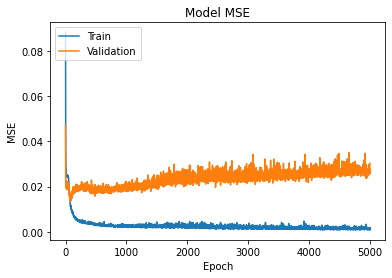

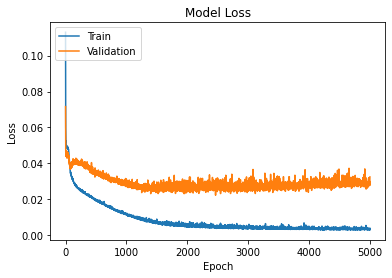

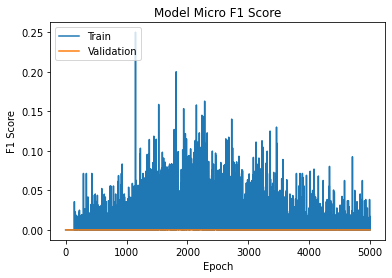

In [11]:
#Visualisation
#acc
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#f1
plt.plot(history.history['f1_micro'])
plt.plot(history.history['val_f1_micro'])
plt.title('Model Micro F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
loss, accuracy,hamming_loss,precision_micro,recall_micro,f1_micro = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nBinary-Accuracy(the same as Micro-Accuracy): %s \nHamming_Loss: %s \nMicro-Precision: %s \nMicro-Recall: %s \nMicro-F1 Score: %s' % (loss, accuracy,hamming_loss,precision_micro,recall_micro,f1_micro))

8/8 [==============================] - 0s 3ms/step - loss: 0.0244 - mse: 0.0222 - hamming_loss: 0.0000e+00 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00
Test:
Loss: 0.024377960711717606
Binary-Accuracy(the same as Micro-Accuracy): 0.022237250581383705 
Hamming_Loss: 0.0 
Micro-Precision: 0.0 
Micro-Recall: 0.0 
Micro-F1 Score: 0.0


In [13]:
num_ensemble = 500
y_pred_all = []
for e in range(num_ensemble):
    y_pred = model.predict(x_test)
    y_pred_all.append(y_pred)

In [14]:
y_pred_m = np.mean(y_pred_all,axis=0)
y_pred_s = np.std(y_pred_all,axis=0)
low = y_pred_m - 1.96*y_pred_s
low = low[:,0]
high = y_pred_m + 1.96*y_pred_s
high = high[:,0]

In [15]:
instances = np.linspace(1,np.shape(x_test)[0],np.shape(x_test)[0])

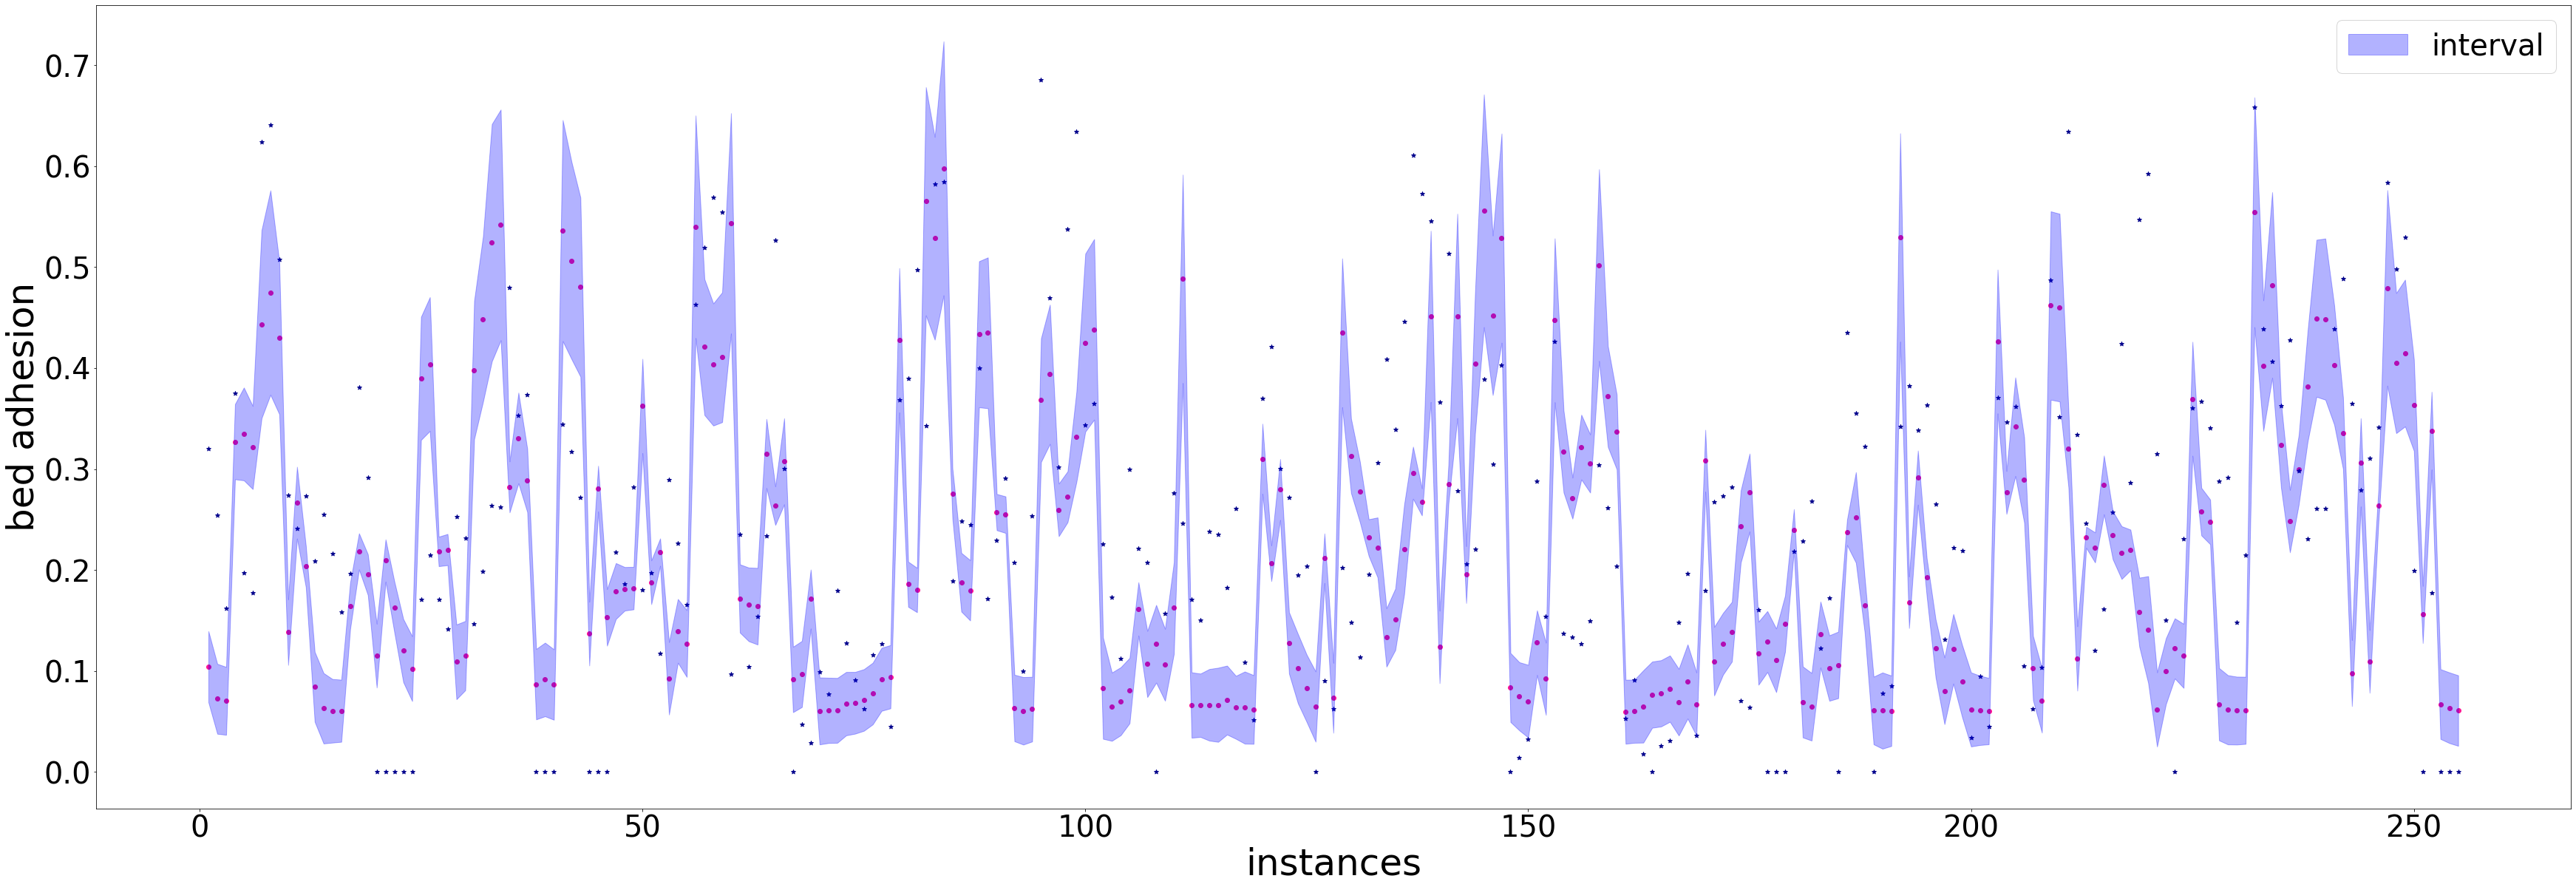

In [16]:
plt.figure(figsize=(60, 20))
plt.scatter(instances,y_pred_m, c='deeppink', marker='o')
plt.scatter(instances,y_test, c='darkblue', marker='*')
plt.fill_between(instances,high,low,color='blue',alpha=0.3,label = 'interval')
plt.legend(prop={'size': 40},loc = "upper right")
plt.xlabel('instances', fontsize=50)
plt.ylabel('bed adhesion', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig("./3D_Point_Estimate_Result%s.jpg",bbox_inches="tight")
plt.show()


In [17]:
y_pred_m.min()

0.059605632

In [18]:
y_test.min()

0.0

In [19]:
arrIndex = np.array(y_test).argsort()
y_test_sorted = y_test[arrIndex]
y_pred_m_sorted = y_pred_m[arrIndex]
low_sorted = low[arrIndex]
high_sorted = high[arrIndex]

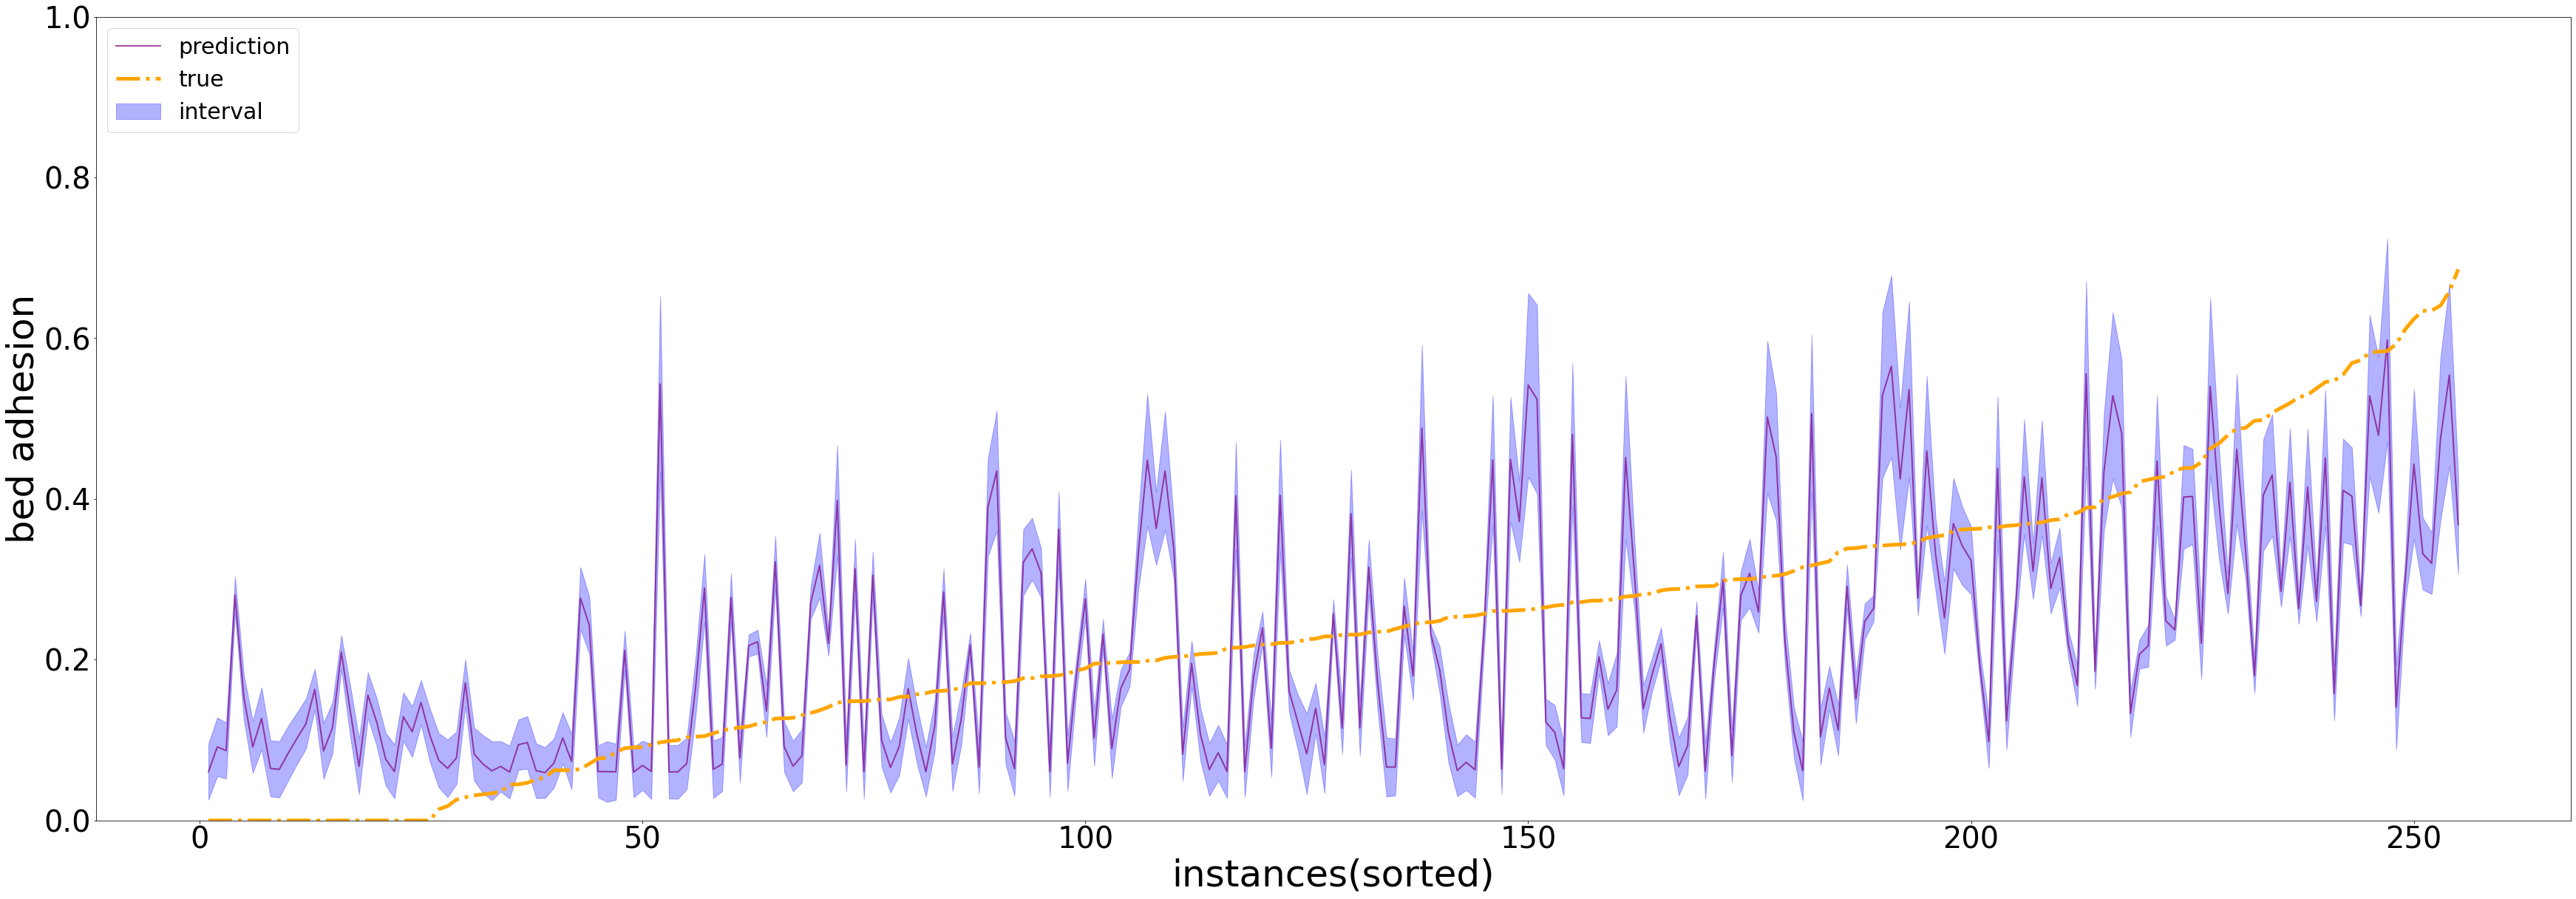

In [23]:
plt.figure(figsize=(60, 20))
plt.plot(instances,y_pred_m_sorted,'purple',label='prediction',alpha = 0.7, linewidth=2.0)
plt.plot(instances,y_test_sorted,'orange',label = 'true', linewidth=5.0,linestyle = '-.')
plt.fill_between(instances,high_sorted,low_sorted,color='blue',alpha=0.3,label = 'interval')
plt.legend(prop={'size': 30},loc = "upper left")
plt.xlabel('instances(sorted)', fontsize=50)
plt.ylabel('bed adhesion', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim(ymin = 0, ymax = 1)
plt.savefig("./3D_Point_Estimate_Result_Sorted.jpg",bbox_inches="tight")
plt.show()